In [1]:
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [2]:
asbl_data = pd.read_excel("C:\\Users\\user\\Downloads\\asbl_data_analyst_interview_assignment_netflix.xlsx")
asbl_data.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [3]:
asbl_data.shape

(8807, 7)

In [4]:
asbl_data.dtypes

Type            object
Title           object
Director        object
Cast            object
Country         object
Release_year     int64
Genres          object
dtype: object

In [5]:
asbl_data.describe(include=['object'])

,Type,Title,Director,Cast,Country,Genres
count,8807,8807,6173,7982,7976,8807
unique,2,8807,4528,7692,748,514
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"Dramas, International Movies"
freq,6131,1,19,19,2818,362


In [6]:
asbl_data.describe()

,Release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# though first contet was released in Netflix on year 1925, 
# most of the TV Show and Movies have been released between year 2000-2021  

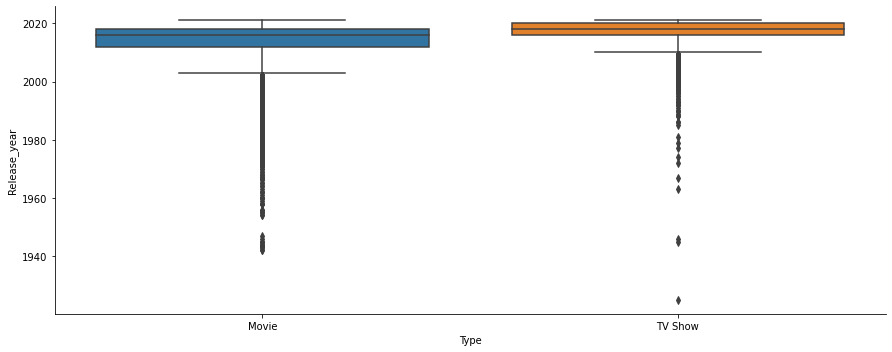

In [8]:
sns.catplot(x='Type', y='Release_year', data=asbl_data, aspect =2.5, kind='box')

In [9]:
asbl_updated = asbl_data.drop(asbl_data[asbl_data["Release_year"] < 2000].index)

In [10]:
asbl_updated.shape

(8282, 7)

In [11]:
asbl_updated.isnull().sum()

Type               0
Title              0
Director        2582
Cast             807
Country          808
Release_year       0
Genres             0
dtype: int64

In [12]:
asbl_updated_1 = asbl_updated.drop(asbl_updated[asbl_updated["Director"].isnull() ].index)
asbl_updated_1 = asbl_updated_1.drop(asbl_updated_1[asbl_updated_1["Cast"].isnull() ].index)
asbl_updated_1 = asbl_updated_1.drop(asbl_updated_1[asbl_updated_1["Country"].isnull() ].index)

In [13]:
asbl_updated_1.shape

(4895, 7)

In [14]:
asbl_updated_1.isnull().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

In [15]:
asbl_updated_1.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,"Dramas, International Movies"
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,Comedies
28,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2013,"Horror Movies, Sci-Fi & Fantasy"


In [16]:
asbl_updated_1.describe(include=['object'])

,Type,Title,Director,Cast,Country,Genres
count,4895,4895,4895,4895,4895,4895
unique,2,4895,3714,4769,581,294
top,Movie,The Great British Baking Show,"Raúl Campos, Jan Suter",Samuel West,United States,"Dramas, International Movies"
freq,4749,1,18,10,1635,321


In [17]:
print('Country\n',asbl_updated_1.Country.value_counts())

Country
 United States                   1635
India                            795
United Kingdom                   170
Canada                           106
Spain                             91
                                ... 
Canada, Norway                     1
France, Senegal, Belgium           1
Uruguay, Guatemala                 1
Romania, Bulgaria, Hungary         1
United Arab Emirates, Jordan       1
Name: Country, Length: 581, dtype: int64


In [50]:
Country_name = asbl_updated_1.Country.value_counts().index

In [51]:
Country_released = asbl_updated_1.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x205839b75b0>,
 [Text(-0.28877626947392393, 1.0614180449703707, 'United States'),
  Text(-0.16065898366752396, -1.0882043424683245, 'India'),
  Text(0.8865660412195318, -0.6511533264572391, 'United Kingdom'),
  Text(1.042947746112695, -0.3496569731586229, 'Canada'),
  Text(1.0942590418658236, -0.11223702283511314, 'Spain')],
 [Text(-0.1575143288039585, 0.5789552972565658, '58.46%'),
  Text(-0.0876321729095585, -0.5935660049827224, '28.42%'),
  Text(0.48358147702883547, -0.3551745417039486, '6.08%'),
  Text(0.5688805887887426, -0.1907219853592488, '3.79%'),
  Text(0.5968685682904492, -0.06122019427369807, '3.25%')])

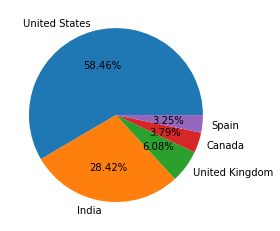

In [54]:
plt.pie(Country_released [:5],labels = Country_name[:5],autopct='%1.2f%%')

In [18]:
# United States is top country where netflix released their most of the content followed by India , UK , Canada , Spain

In [116]:
Actor_in_country_usa = asbl_updated_1[asbl_updated_1['Country'] == 'United States'].groupby('Cast').size().reset_index().rename(columns={0:'count'})

In [119]:
Actor_in_country_usa.sort_values(by=['count'],ascending=False)

,Cast,count
654,Jeff Dunham,7
855,Kevin Hart,6
1301,Samuel West,5
709,Jim Gaffigan,5
174,Bill Burr,4
...,...,...
522,"Grace Van Dien, Sean Patrick Flanery, Christin...",1
521,Gloria Allred,1
520,"Ginnifer Goodwin, Mae Whitman, Rosario Dawson,...",1
519,"Gina Rodriguez, Brittany Snow, DeWanda Wise, L...",1


In [118]:
Actor_in_country_India = asbl_updated_1[asbl_updated_1['Country'] == 'India'].groupby('Cast').size().reset_index().rename(columns={0:'count'})

In [120]:
Actor_in_country_India.sort_values(by=['count'],ascending=False)

,Cast,count
496,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",2
775,Vir Das,2
532,"Ranjit Bawa, Mandy Takhar, Manav Vij, Elnaaz N...",1
523,"Ranbir Kapoor, Konkona Sen Sharma, Shruti Bapn...",1
524,"Ranbir Kapoor, Priyanka Chopra, Ileana D'Cruz,...",1
...,...,...
267,"Jacob Gregory, S.V. Krishna Shankar, Shine Tom...",1
268,"Jacqueline Fernandez, Manoj Bajpayee, Mohit Ra...",1
269,"Jacqueline Fernandez, Sushant Singh Rajput, Bo...",1
270,"Janhvi Kapoor, Pankaj Tripathi, Angad Bedi, Vi...",1


In [121]:
Actor_in_country_United_Kingdom = asbl_updated_1[asbl_updated_1['Country'] == 'United Kingdom'].groupby('Cast').size().reset_index().rename(columns={0:'count'})

In [123]:
Actor_in_country_United_Kingdom.sort_values(by=['count'],ascending=False)

,Cast,count
136,Samuel West,4
122,Rachael Stirling,3
59,Jack Whitehall,2
28,David Attenborough,2
0,"Abbie Cornish, Andrea Riseborough, James D'Arc...",1
...,...,...
56,Iain Glen,1
57,"Jack Lowden, Martin McCann, Tony Curran, Ian P...",1
58,"Jack O'Connell, Ben Mendelsohn, Rupert Friend,...",1
60,"Jack Whitehall, Joanna Scanlan, Iain Glen, Eth...",1


In [124]:
Actor_in_country_Canada = asbl_updated_1[asbl_updated_1['Country'] == 'Canada'].groupby('Cast').size().reset_index().rename(columns={0:'count'})

In [125]:
Actor_in_country_Canada.sort_values(by=['count'],ascending=False)

,Cast,count
0,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",1
79,"Patrick Huard, Colm Feore, Sylvain Marcel, Luc...",1
77,"Nina Kiri, Ry Barrett, Jorja Cadence, Will Kin...",1
76,"Nicolas Cage, Sarah Lind, Hugh Dillon, Jakob D...",1
75,"Natalie Hall, Evan Williams, Michael Gordon Sh...",1
...,...,...
32,"Hamish Linklater, Eve Hewson, Avan Jogia, Andi...",1
31,"Guillaume Laurin, Marie-Evelyne Lessard, Réal ...",1
30,"Gord Downie, Paul Langlois, Gord Sinclair, Rob...",1
29,"Erika Linder, Natalie Krill, Sebastian Pigott,...",1


In [126]:
Actor_in_country_Spain = asbl_updated_1[asbl_updated_1['Country'] == 'Spain'].groupby('Cast').size().reset_index().rename(columns={0:'count'})

In [127]:
Actor_in_country_Spain.sort_values(by=['count'],ascending=False)

,Cast,count
0,"Adriana Ugarte, Chino Darín, Javier Gutiérrez,...",1
68,"Nathalie Seseña, Goyo Jiménez, José Juan Vaque...",1
66,"Natalia de Molina, Daniel Grao, Natalia Mateo,...",1
65,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",1
64,"María Pedraza, Pol Monen, Natalia Tena, Nacho ...",1
...,...,...
28,"Emma Suárez, Jorge Bosch, Álvaro Cervantes, Ca...",1
27,"Emilio Palacios, Jorge Clemente, Beatriz Medin...",1
26,"Eduardo Noriega, Michelle Jenner, Fele Martíne...",1
25,"Eduard Fernández, José Coronado, Marta Etura, ...",1


In [ ]:
# Top 5 Country and Actors who are famous in those Countries

In [19]:
print('Cast\n',asbl_updated_1.Cast.value_counts())

Cast
 Samuel West                                                                                                                                                      10
Jeff Dunham                                                                                                                                                       7
Kevin Hart                                                                                                                                                        6
Jim Gaffigan                                                                                                                                                      5
Bill Burr                                                                                                                                                         5
                                                                                                                                                                 ..
Ryan Reyno

In [55]:
Actor = asbl_updated_1.Cast.value_counts().index

In [56]:
Actor_work = asbl_updated_1.Cast.value_counts().values

([<matplotlib.patches.Wedge at 0x205839fbbb0>,
 [Text(0.6380625751062828, 0.8960335653583181, 'Samuel West'),
  Text(-0.9253789316708985, 0.5947048283136995, 'Jeff Dunham'),
  Text(-0.8646583270487659, -0.6799749829701308, 'Kevin Hart'),
  Text(0.15654647964602333, -1.0888035634174043, 'Jim Gaffigan'),
  Text(0.9777190807550031, -0.5040490046886235, 'Bill Burr')],
 [Text(0.34803413187615423, 0.4887455811045371, '30.30%'),
  Text(-0.5047521445477627, 0.32438445180747244, '21.21%'),
  Text(-0.4716318147538722, -0.3708954452564349, '18.18%'),
  Text(0.08538898889783089, -0.5938928527731295, '15.15%'),
  Text(0.5333013167754562, -0.2749358207392491, '15.15%')])

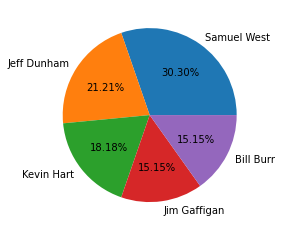

In [57]:
plt.pie(Actor_work[:5],labels = Actor[:5],autopct='%1.2f%%')

In [20]:
# Samuel West,Jeff Dunham ,Kevin Hart ,Jim Gaffigan ,Bill Burr are Actors with whom Netflix should work .

In [105]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Samuel West'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Documentaries,3
1,"Documentaries, International Movies",7


In [106]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Jeff Dunham'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,7


In [107]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Kevin Hart'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,6


In [108]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Jim Gaffigan'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,5


In [109]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Bill Burr'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,5


In [ ]:
# Top 5 Actor and their working Genres

In [21]:
print('Genres\n',asbl_updated_1.Genres.value_counts())

Genres
 Dramas, International Movies                                         321
Stand-Up Comedy                                                      273
Comedies, Dramas, International Movies                               243
Dramas, Independent Movies, International Movies                     235
Children & Family Movies, Comedies                                   169
                                                                    ... 
Anime Features, International Movies, Sci-Fi & Fantasy                 1
International TV Shows, Stand-Up Comedy & Talk Shows, TV Comedies      1
International TV Shows, Spanish-Language TV Shows, TV Comedies         1
International TV Shows, TV Action & Adventure, TV Comedies             1
Cult Movies, Dramas, Thrillers                                         1
Name: Genres, Length: 294, dtype: int64


([<matplotlib.patches.Wedge at 0x20583a46670>,
 [Text(0.756364820996075, 0.798694095107492, 'Dramas, International Movies'),
  Text(-0.7461950737055185, 0.8082035090109518, 'Stand-Up Comedy'),
  Text(-0.97519348799151, -0.5089181279724205, 'Comedies, Dramas, International Movies'),
  Text(0.13195245168071143, -1.092057027126079, 'Dramas, Independent Movies, International Movies'),
  Text(1.000857969899713, -0.4563806789164339, 'Children & Family Movies, Comedies')],
 [Text(0.4125626296342227, 0.4356513246040865, '25.87%'),
  Text(-0.4070154947484646, 0.4408382776423373, '22.00%'),
  Text(-0.5319237207226417, -0.2775917061667748, '19.58%'),
  Text(0.07197406455311531, -0.5956674693414976, '18.94%'),
  Text(0.5459225290362071, -0.2489349157726003, '13.62%')])

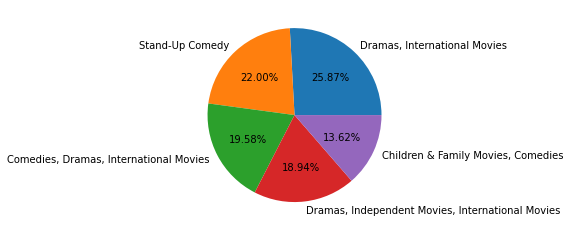

In [58]:
Genres_name = asbl_updated_1.Genres.value_counts().index
Genres_value = asbl_updated_1.Genres.value_counts().values
plt.pie(Genres_value [:5],labels = Genres_name[:5],autopct='%1.2f%%')

In [22]:
# Genres
# [Dramas, International Movies                                         
# Stand-Up Comedy                                                      
# Comedies, Dramas, International Movies                             
# Dramas, Independent Movies, International Movies                     
# Children & Family Movies, Comedies] are most followed genres by poeple.

In [75]:
Director_1 = asbl_updated_1[asbl_updated_1['Genres'] == 'Dramas, International Movies'].groupby('Director').size().reset_index().rename(columns={0:'count'})

In [128]:
Director_1.sort_values(by=['count'],ascending=False)

,Director,count
88,Hanung Bramantyo,5
144,Madhur Bhandarkar,4
145,Mahesh Manjrekar,4
217,Riri Riza,4
200,Prakash Jha,3
...,...,...
104,Jastis Arimba,1
105,Jayaraj Rajasekharan Nair,1
106,Jayme Monjardim,1
107,Jean-Claude Flamand-Barny,1


In [94]:
Director_2 = asbl_updated_1[asbl_updated_1['Genres'] == 'Stand-Up Comedy'].groupby('Director').size().reset_index().rename(columns={0:'count'})

In [129]:
Director_2.sort_values(by=['count'],ascending=False)

,Director,count
122,"Raúl Campos, Jan Suter",18
94,Marcus Raboy,14
54,Jay Karas,13
53,Jay Chapman,11
137,Shannon Hartman,8
...,...,...
50,"Jan Suter, Raúl Campos Delgado",1
49,"Jan Suter, Raúl Campos",1
48,Jan Suter,1
47,James Yukich,1


In [81]:
Director_3 = asbl_updated_1[asbl_updated_1['Genres'] == 'Comedies'].groupby('Director').size().reset_index().rename(columns={0:'count'})

In [130]:
Director_3.sort_values(by=['count'],ascending=False)

,Director,count
45,"Jon Lucas, Scott Moore",2
0,Adam McKay,1
65,Neil LaBute,1
64,Neal Brennan,1
63,Natasha Lyonne,1
...,...,...
28,"Ethan Coen, Joel Coen",1
27,Erik White,1
26,Eric Stoltz,1
25,Eric Idle,1


In [84]:
asbl_updated_1[asbl_updated_1['Genres'] == 'Independent Movies'].groupby('Director').size().reset_index().rename(columns={0:'count'})

,Director,count
0,Mark Landre Gould,1


In [88]:
Direcor_5 = asbl_updated_1[asbl_updated_1['Genres'] == 'Children & Family Movies'].groupby('Director').size().reset_index().rename(columns={0:'count'})

In [131]:
Direcor_5.sort_values(by=['count'],ascending=False)

,Director,count
71,Rajiv Chilaka,3
76,Richard Weston,3
100,William Lau,3
13,Blair Simmons,3
39,Ishi Rudell,2
...,...,...
36,Henry Selick,1
35,Greg Richardson,1
34,Geoff Anderson,1
32,Eric D. Cabello Díaz,1


In [ ]:
# Top 5 Genres and top Directors who work on that Genres

In [23]:
print('Director\n',asbl_updated_1.Director.value_counts())

Director
 Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Kim Joo-hyung              1
Louie Psihoyos             1
Ahmet Katıksız             1
Jean-François Blais        1
Mozez Singh                1
Name: Director, Length: 3714, dtype: int64


([<matplotlib.patches.Wedge at 0x20583a8ae50>,
 [Text(0.7778174593052024, 0.7778174593052024, 'Raúl Campos, Jan Suter'),
  Text(-0.6696375582917576, 0.872688684769691, 'Marcus Raboy'),
  Text(-1.033661890692157, -0.3762221361519223, 'Jay Karas'),
  Text(-0.04798134896662775, -1.0989530427417464, 'Cathy Garcia-Molina'),
  Text(0.9526279355804297, -0.5500000148652443, 'Jay Chapman')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.00%'),
  Text(-0.3652568499773223, 0.47601200987437686, '20.83%'),
  Text(-0.5638155767411764, -0.20521207426468485, '19.44%'),
  Text(-0.02617164489088786, -0.5994289324045889, '18.06%'),
  Text(0.5196152375893253, -0.300000008108315, '16.67%')])

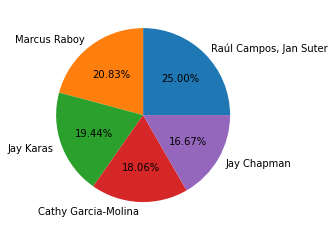

In [59]:
Director_name = asbl_updated_1.Director.value_counts().index
Director_value = asbl_updated_1.Director.value_counts().values
plt.pie(Director_value [:5],labels = Director_name[:5],autopct='%1.2f%%')

In [24]:
# Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the drector 
# who have directed most of the content in between last 20 years 

In [100]:
asbl_updated_1[asbl_updated_1['Director'] == 'Raúl Campos, Jan Suter'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,18


In [101]:
asbl_updated_1[asbl_updated_1['Director'] == 'Marcus Raboy'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,Stand-Up Comedy,14
1,"Stand-Up Comedy & Talk Shows, TV Comedies",1


In [102]:
asbl_updated_1[asbl_updated_1['Director'] == 'Jay Karas'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,"Children & Family Movies, Comedies, Sports Movies",1
1,Stand-Up Comedy,13


In [103]:
asbl_updated_1[asbl_updated_1['Director'] == 'Cathy Garcia-Molina'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,"Comedies, Dramas, International Movies",5
1,"Comedies, International Movies, Romantic Movies",2
2,"Dramas, International Movies, Romantic Movies",4
3,"International Movies, Romantic Movies",2


In [104]:
asbl_updated_1[asbl_updated_1['Director'] == 'Jay Chapman'].groupby('Genres').size().reset_index().rename(columns={0:'count'})

,Genres,count
0,"Music & Musicals, Stand-Up Comedy",1
1,Stand-Up Comedy,11


In [ ]:
# Top 5 Directors and their working Genres

In [25]:
asbl_movie = asbl_data.drop(asbl_data[asbl_data["Type"] == "TV Show"].index)

In [26]:
asbl_movie.shape

(6131, 7)

In [27]:
asbl_movie_re = asbl_updated_1.drop(asbl_updated_1[asbl_updated_1["Type"] == "TV Show"].index)

In [28]:
asbl_movie_re.shape

(4749, 7)

In [29]:
# Number of Movies is significantly larger than number of TV Shows

In [132]:
Genres = asbl_updated_1.Genres.value_counts()

In [133]:
Genres_1 = Genres.head(10)

In [ ]:
Genres_name = Genres_1.index

In [134]:
Genres_value = Genres_1.values

In [135]:
Genres_df = {'Genres_name': Genres_1.index,
            'Genres_value': Genres_1.values}

In [136]:
Genres_df = pd.DataFrame(Genres_df)

In [137]:
Genres_df

,Genres_name,Genres_value
0,"Dramas, International Movies",321
1,Stand-Up Comedy,273
2,"Comedies, Dramas, International Movies",243
3,"Dramas, Independent Movies, International Movies",235
4,"Children & Family Movies, Comedies",169
5,Documentaries,154
6,"Comedies, International Movies",149
7,"Dramas, International Movies, Romantic Movies",148
8,"Comedies, International Movies, Romantic Movies",138
9,"Dramas, International Movies, Thrillers",124


In [138]:
final_df = {'Genres':[],'year':[],'frrequency':[]}

In [140]:
final_df

{'Genres': [], 'year': [], 'frrequency': []}

In [141]:
for j in range(0,len(Genres_df)):

    for i in range(2000,2022):
        t_df = asbl_updated_1.drop(asbl_updated_1[asbl_updated_1['Release_year'] != i].index).reset_index()
        final_df['Genres'].append(Genres_df['Genres_name'][j])
        final_df['year'].append(i)
        year = 0
        for k in range(0,len(t_df)):
            if(Genres_df['Genres_name'][j] == t_df['Genres'][k]):
                year = year+1
        final_df['frrequency'].append(year)

In [142]:
len(final_df['Genres'])

220

In [143]:
len(final_df['year'])

220

In [144]:
len(final_df['frrequency'])

220

In [147]:
final_df 

{'Genres': ['Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Dramas, International Movies',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up Comedy',
  'Stand-Up

In [148]:
final_df = pd.DataFrame(final_df) 

In [149]:
final_df

,Genres,year,frrequency
0,"Dramas, International Movies",2000,0
1,"Dramas, International Movies",2001,1
2,"Dramas, International Movies",2002,4
3,"Dramas, International Movies",2003,1
4,"Dramas, International Movies",2004,6
...,...,...,...
215,"Dramas, International Movies, Thrillers",2017,13
216,"Dramas, International Movies, Thrillers",2018,21
217,"Dramas, International Movies, Thrillers",2019,14
218,"Dramas, International Movies, Thrillers",2020,13


Text(0, 0.5, 'number of Content released')

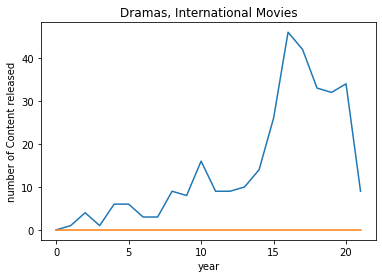

In [150]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Dramas, International Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Dramas, International Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

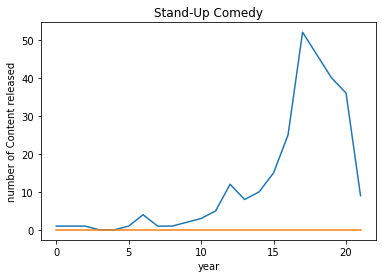

In [151]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Stand-Up Comedy'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Stand-Up Comedy')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

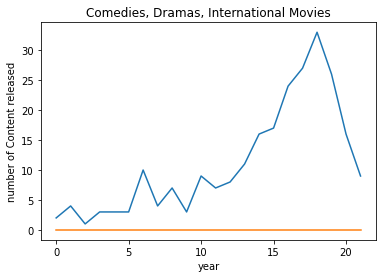

In [152]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Comedies, Dramas, International Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Comedies, Dramas, International Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

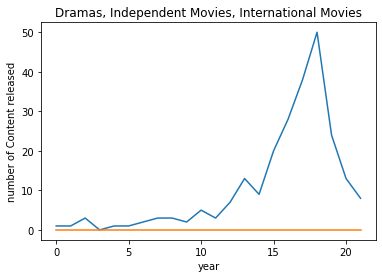

In [153]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Dramas, Independent Movies, International Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Dramas, Independent Movies, International Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

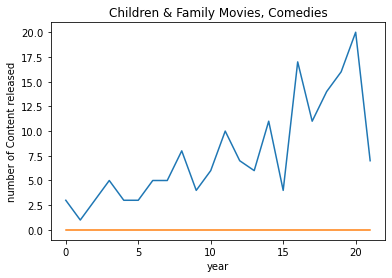

In [154]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Children & Family Movies, Comedies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Children & Family Movies, Comedies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

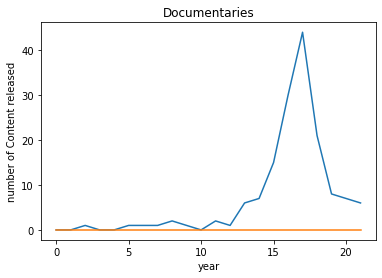

In [155]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Documentaries'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Documentaries')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

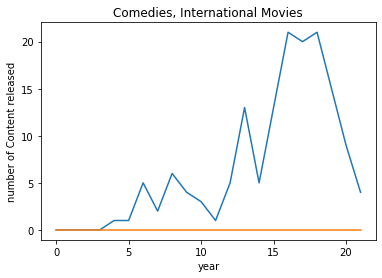

In [156]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Comedies, International Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Comedies, International Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

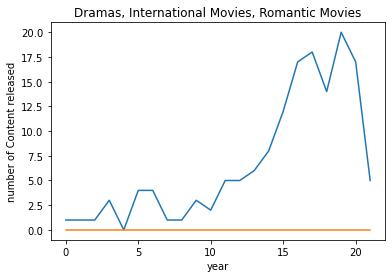

In [157]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Dramas, International Movies, Romantic Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Dramas, International Movies, Romantic Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

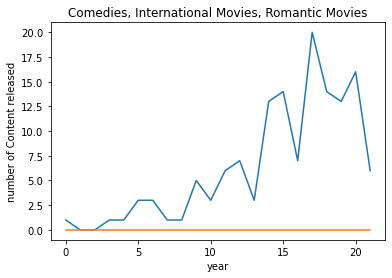

In [158]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Comedies, International Movies, Romantic Movies'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Comedies, International Movies, Romantic Movies')
plt.xlabel("year")
plt.ylabel("number of Content released")

Text(0, 0.5, 'number of Content released')

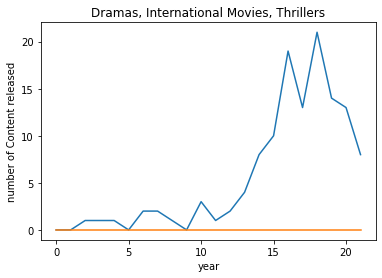

In [159]:
temp_df = final_df.drop(final_df[final_df['Genres'] != 'Dramas, International Movies, Thrillers'].index).reset_index()
temp_df['Date']=pd.to_datetime(temp_df['year'])
temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
plt.plot(temp_1)
plt.title('Dramas, International Movies, Thrillers')
plt.xlabel("year")
plt.ylabel("number of Content released")

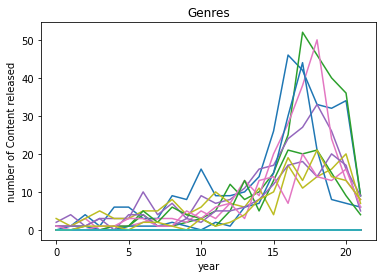

In [165]:
for i in range(0,len(Genres_df)):
    temp_df = final_df.drop(final_df[final_df['Genres'] != Genres_df['Genres_name'][i]].index).reset_index()
    temp_df['Date']=pd.to_datetime(temp_df['year'])
    temp_1=temp_df.drop(['index','Genres','year'],axis = 1)
    plt.plot(temp_1)
    plt.title('Genres')
    plt.xlabel("year")
    plt.ylabel("number of Content released")
    

In [ ]:
#Top 10 Genres and their pattern in last 20 year, shows that Dramas,International Movies,Stand-Up Comedy, are in top treands followed by Documentaries and all.

In [30]:
# question ans

In [31]:
# a 

In [32]:
print('Director\n',asbl_movie.Director.value_counts())

Director
 Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: Director, Length: 4354, dtype: int64


In [33]:
# Rajiv Chilaka,Raúl Campos, Jan Suter,Suhas Kadav,Marcus Raboy are the top 5 directors who produce most of the movies only

In [34]:
# b

In [35]:
print('Genres\n',asbl_data.Genres.value_counts())

Genres
 Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: Genres, Length: 514, dtype: int64


In [36]:
#  Dramas, International Movies,Documentaries,Stand-Up Comedy,Comedies are the top 5 genres which are liked by people 
#  or here liking means listed on the portal of Netflix

In [37]:
# c 

In [38]:
Director = asbl_updated_1.Director.value_counts()
Director.head(2)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Name: Director, dtype: int64

In [39]:
# "Raúl Campos", "Jan Suter"  2 directors should Netflix collaborate with more
# based on the increase in their movies or tv shows over the recent past years

In [40]:
# d

In [41]:
actor = asbl_data.Cast.value_counts()

In [42]:
actor.head(10)

David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6


In [43]:
#David Attenborough,Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil,Samuel West,
#Jeff Dunham are top 10 Actors 

In [44]:
# e

In [45]:
print('Cast\n',asbl_updated_1.Cast.value_counts())

Cast
 Samuel West                                                                                                                                                      10
Jeff Dunham                                                                                                                                                       7
Kevin Hart                                                                                                                                                        6
Jim Gaffigan                                                                                                                                                      5
Bill Burr                                                                                                                                                         5
                                                                                                                                                                 ..
Ryan Reyno

In [46]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Samuel West'] 

,Type,Title,Director,Cast,Country,Release_year,Genres
7970,Movie,Secrets of Althorp - The Spencers,Kasia Uscinska,Samuel West,United States,2013,"Documentaries, International Movies"
7971,Movie,Secrets of Chatsworth,Susannah Ward,Samuel West,United States,2013,"Documentaries, International Movies"
7972,Movie,Secrets of Henry VIII's Palace: Hampton Court,Sam Taplin,Samuel West,United States,2013,"Documentaries, International Movies"
7973,Movie,Secrets of Her Majesty's Secret Service,Kasia Uscinska,Samuel West,United Kingdom,2014,"Documentaries, International Movies"
7974,Movie,Secrets of Highclere Castle,Vicky Matthews,Samuel West,United States,2013,"Documentaries, International Movies"
7975,Movie,Secrets of Scotland Yard,Susannah Ward,Samuel West,United Kingdom,2013,Documentaries
7976,Movie,Secrets of Selfridges,Sam Taplin,Samuel West,United States,2014,Documentaries
7977,Movie,Secrets of the Tower of London,Vicky Matthews,Samuel West,United Kingdom,2013,Documentaries
7978,Movie,Secrets of Underground London,"Vicky Matthews, Gareth Sacala",Samuel West,United Kingdom,2014,"Documentaries, International Movies"
7979,Movie,Secrets of Westminster,Louise Wardle,Samuel West,"United States, United Kingdom",2014,"Documentaries, International Movies"


In [47]:
asbl_updated_1[asbl_updated_1['Cast'] == 'Jeff Dunham'] 

,Type,Title,Director,Cast,Country,Release_year,Genres
3061,Movie,Jeff Dunham: Unhinged in Hollywood,Michael Simon,Jeff Dunham,United States,2015,Stand-Up Comedy
3260,Movie,Jeff Dunham: All Over the Map,Robb Dipple,Jeff Dunham,United States,2014,Stand-Up Comedy
3495,Movie,Jeff Dunham: Beside Himself,Troy Miller,Jeff Dunham,United States,2019,Stand-Up Comedy
4007,Movie,Jeff Dunham: Arguing with Myself,Manny Rodriguez,Jeff Dunham,United States,2006,Stand-Up Comedy
4008,Movie,Jeff Dunham: Controlled Chaos,"Michael Simon, Matthew McNeil",Jeff Dunham,United States,2011,Stand-Up Comedy
4009,Movie,Jeff Dunham: Minding the Monsters,Manny Rodriguez,Jeff Dunham,United States,2012,Stand-Up Comedy
5276,Movie,Jeff Dunham: Relative Disaster,Michael Simon,Jeff Dunham,United States,2017,Stand-Up Comedy


In [48]:
# "Samuel West","Jeff Dunham" two actors should Netflix collaborate with more 
# based on the increase in their movies or tv shows over the recent past years